In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


Text(0, 0.5, 'y')

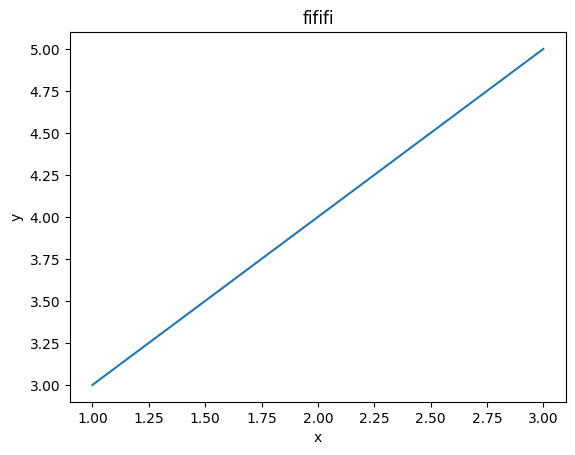

In [7]:
x=[1,2,3]
y=[3,4,5]
plt.plot(x,y)
plt.title("fififi")
plt.xlabel("x")
plt.ylabel("y")


0       -79.452490
1       -79.452490
2       -79.199786
3       -79.318797
4       -79.199786
           ...    
18189   -79.436534
18190   -79.436534
18191   -79.436534
18192   -79.421268
18193   -79.421268
Name: lon, Length: 18194, dtype: float64


<Axes: >

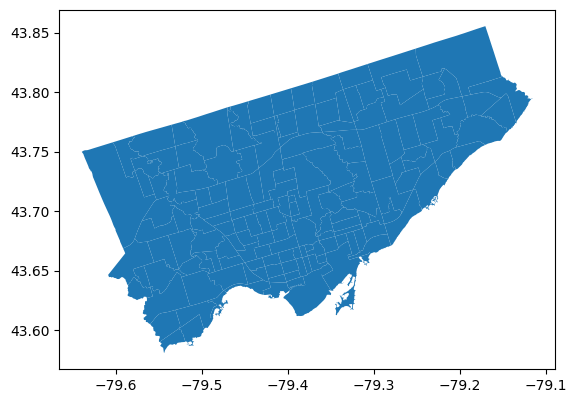

In [114]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import json

df_accidents = pd.read_csv("toronto_accidents.csv")
df_accidents["lon"] = 0.0
df_accidents["lat"] = 0.0

for index, row in df_accidents.iterrows():
    # coordinates = json.loads(df_accidents.geometry[index]) # coordinates is float, in (long, lat) format
    # df_accidents[index]['longitude'],df_accidents[index]['latitude'] = coordinates["coordinates"][0],coordinates["coordinates"][1]# add two col to store lati and longti
    # df_accidents[index]['latitude'] = row["coordinates"][0]
    # df_accidents[index]['longitude'] = row["coordinates"][1]
    lon=json.loads(row["geometry"])["coordinates"][0]
    lat=json.loads(row["geometry"])["coordinates"][1]
    df_accidents.at[index,"lon"] = lon
    df_accidents.at[index,"lat"]=lat    
    

    
print(df_accidents["lon"])
geometry = [Point(lon, lat) for lon, lat in zip(df_accidents['lon'], df_accidents['lat'])]
# geometry = [Point(-79.452490, 43.656345)]

gdf = gpd.GeoDataFrame(df_accidents, geometry=geometry, crs='EPSG:4326')
# gdf.plot(marker=".")
fig, ax = plt.subplots()
toronto = gpd.read_file("geo-toronto/Neighbourhoods.geojson")
toronto.plot(ax=ax, figsize=(40,20)) # draw toronto map
# plt.title("Toronto accidents")
# gdf.plot(ax=ax, marker='o',markersize=50)
# df_accidents["counts"] = 1
# group_by_neighbor = df_accidents.groupby("NEIGHBOURHOOD_158").count()
# # df_accidents

# # group_by_neighbor.sort_values('count')
# group_by_neighbor.sort_values("counts")
# gdf